<a href="https://colab.research.google.com/github/poojitha2730/Loan-Prediction-Project/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

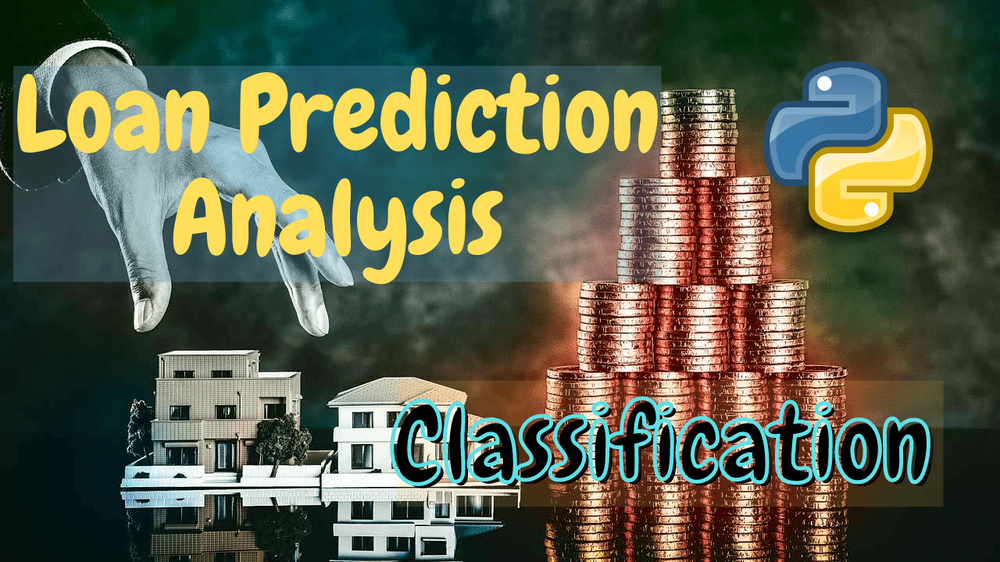

importing requaried libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm



setting path of dataset

In [3]:
df = pd.read_csv("/content/Loan payments data.csv")

Definition and Usage of "head()":
      Returns the header row and the first 10 rows, or the specified number of rows

In [4]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


usage of "describe()":
    Returns a description summary for each column in the DataFrame

In [5]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


info() method :	It prints information about the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


df.null(): It is used to check whether the null values are present is data set or not
df.isnull().sum(): It is used to check total number of null missing values


In [7]:
df.isnull().sum()  #to check total number of null missing values

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

fillna() :It is Used to replace NULL values with the specified value

In [8]:

df['past_due_days'] = df['past_due_days'].fillna(df['past_due_days'].mode()[0])


In [9]:
df['paid_off_time'] = df['paid_off_time'].fillna(df['paid_off_time'].mode()[0])

After performing fillina() method our data as no null values let's check

In [10]:
df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

Lets visulaise which age group of pepole are taking loan mostly using Histogram

<Axes: >

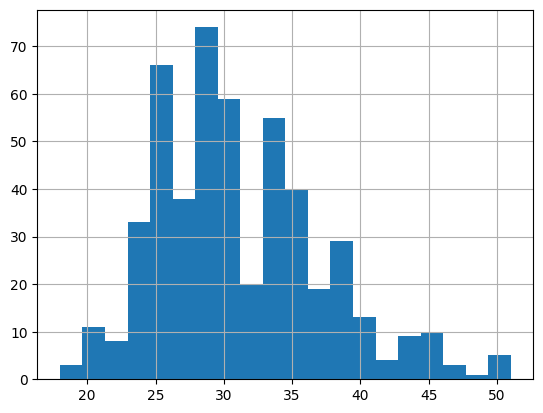

In [11]:
df['age'].hist(bins=20) #visulizing data in form of Histogram


Lets visulaise which gender people are taking more loans using Histogram

<Axes: >

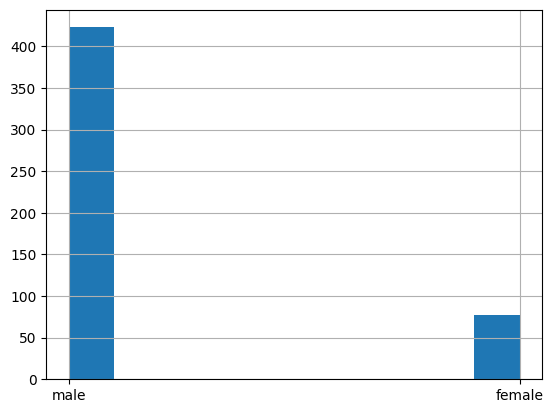

In [12]:
df['Gender'].hist(bins=10)

Visualising which education background people are taking loans more

<Axes: >

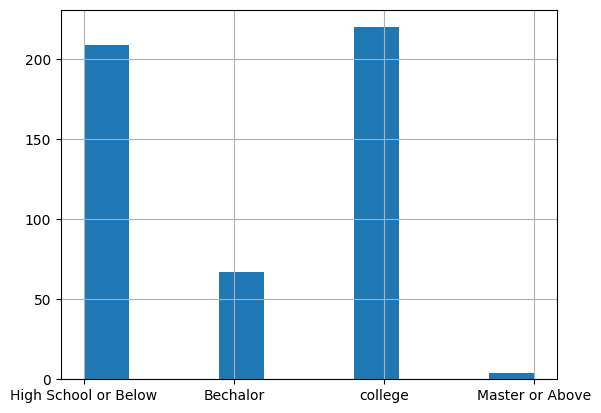

In [13]:
df['education'].hist(bins=10)

Visualising loan_Staus of peole from data set

<Axes: >

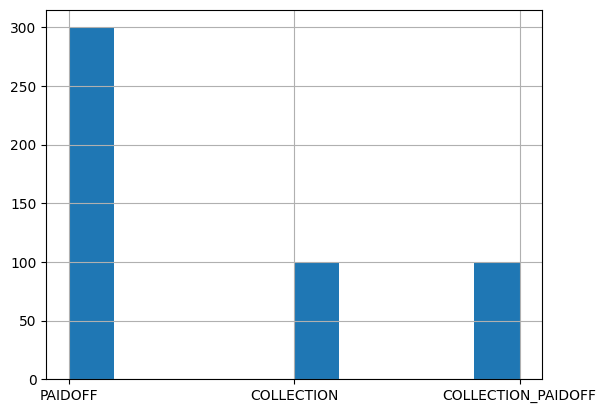

In [14]:
df['loan_status'].hist(bins=10)

Seaborn:Seaborn is more comfortable in handling Pandas data frames. It uses basic sets of methods to provide beautiful graphics in python.

Lets try to ploting some of the attributes using Seaborn i.e by using sns.displot()

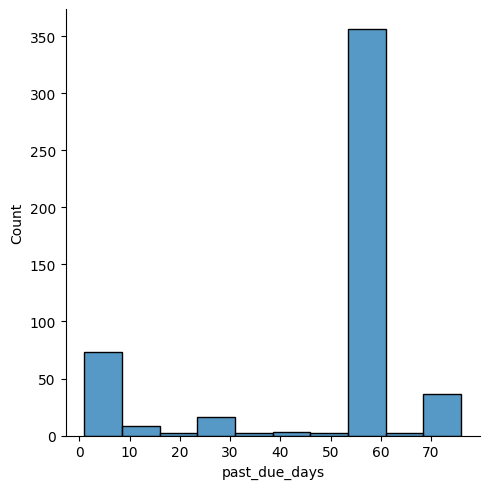

In [15]:
#ploting using sns
sns.displot(df["past_due_days"])

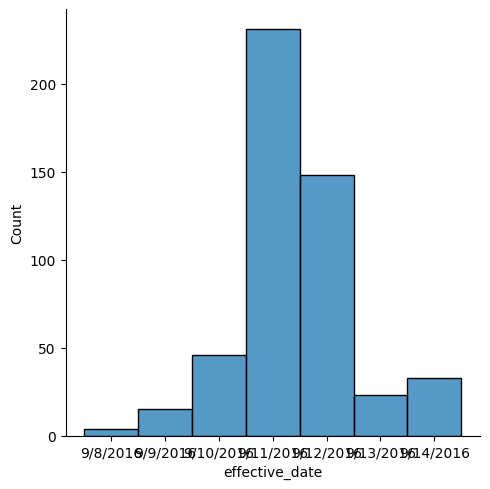

In [16]:
#plotiong using sns
sns.displot(df["effective_date"])

In [17]:
df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

Adding new Attribute using the attributes which we have

<ipython-input-18-86235ef5cf2b>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['past_due_days _log']= np.str(df['TotalIncome'])


<Axes: >

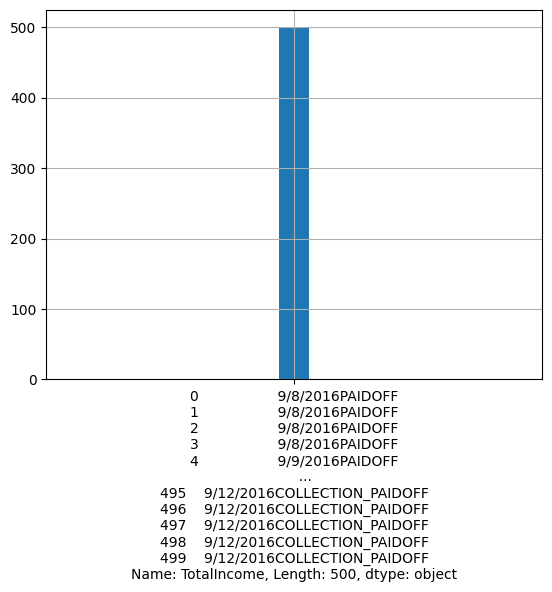

In [18]:
df['TotalIncome']= df['effective_date']+ df['loan_status']
df['past_due_days _log']= np.str(df['TotalIncome'])
df['past_due_days _log'].hist(bins=15)

New attribute TotalIncme gets created =

In [19]:
df1=df.isnull().sum(axis=0)
df1

Loan_ID               0
loan_status           0
Principal             0
terms                 0
effective_date        0
due_date              0
paid_off_time         0
past_due_days         0
age                   0
education             0
Gender                0
TotalIncome           0
past_due_days _log    0
dtype: int64

iloc():
   iloc() method is ued to get or set the values of a group of elements in the specified positions

In [20]:
x= df.iloc[:,np.r_[1:5,9:11.13:15]].values  #lioc mathod is used specific row or colum  from dataset using, iloc method we can retrive any particular value from any row or column
y= df.iloc[:,12].values

x

array([['PAIDOFF', 1000, 30, '9/8/2016', 'High School or Below'],
       ['PAIDOFF', 1000, 30, '9/8/2016', 'Bechalor'],
       ['PAIDOFF', 1000, 30, '9/8/2016', 'Bechalor'],
       ...,
       ['COLLECTION_PAIDOFF', 800, 15, '9/12/2016', 'college'],
       ['COLLECTION_PAIDOFF', 1000, 30, '9/12/2016', 'college'],
       ['COLLECTION_PAIDOFF', 1000, 30, '9/12/2016',
        'High School or Below']], dtype=object)

In [21]:
y

array(['0                  9/8/2016PAIDOFF\n1                  9/8/2016PAIDOFF\n2                  9/8/2016PAIDOFF\n3                  9/8/2016PAIDOFF\n4                  9/9/2016PAIDOFF\n                  ...             \n495    9/12/2016COLLECTION_PAIDOFF\n496    9/12/2016COLLECTION_PAIDOFF\n497    9/12/2016COLLECTION_PAIDOFF\n498    9/12/2016COLLECTION_PAIDOFF\n499    9/12/2016COLLECTION_PAIDOFF\nName: TotalIncome, Length: 500, dtype: object',
       '0                  9/8/2016PAIDOFF\n1                  9/8/2016PAIDOFF\n2                  9/8/2016PAIDOFF\n3                  9/8/2016PAIDOFF\n4                  9/9/2016PAIDOFF\n                  ...             \n495    9/12/2016COLLECTION_PAIDOFF\n496    9/12/2016COLLECTION_PAIDOFF\n497    9/12/2016COLLECTION_PAIDOFF\n498    9/12/2016COLLECTION_PAIDOFF\n499    9/12/2016COLLECTION_PAIDOFF\nName: TotalIncome, Length: 500, dtype: object',
       '0                  9/8/2016PAIDOFF\n1                  9/8/2016PAIDOFF\n2               

In [22]:
print("per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))
#shape(): Returns the number of rows and columns of the DataFrame

per of missing gender is 0.000000%


 Now lets print count of peoples who toke loan will print which gender pepole has taken loan frequently

number of peploe who take loan as group by gender:


<Axes: xlabel='Gender', ylabel='count'>

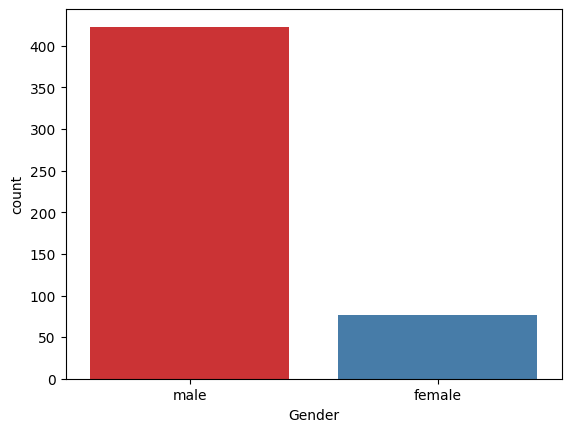

In [23]:
print("number of peploe who take loan as group by gender:")
sns.countplot(x='Gender', data=df, palette = "Set1")

Now will print PAIDOFF count,COLLECTION count,COLLECTION_PAIDOFF count

Loan status of people:: 


<Axes: xlabel='loan_status', ylabel='count'>

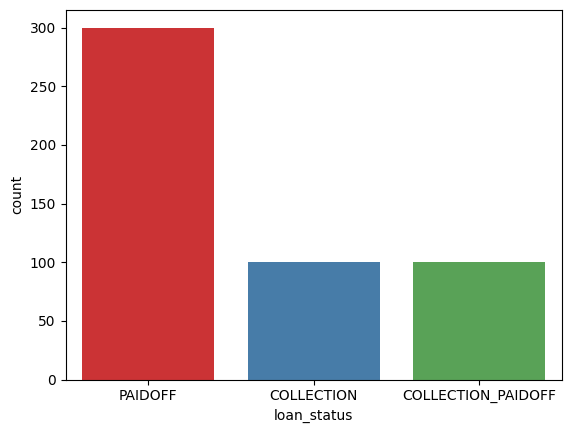

In [24]:
print("Loan status of people:: ")
sns.countplot(x='loan_status', data=df, palette = "Set1")

Lets print the count of people who has due date on same dates

due dates of peoples: 


<Axes: xlabel='due_date', ylabel='count'>

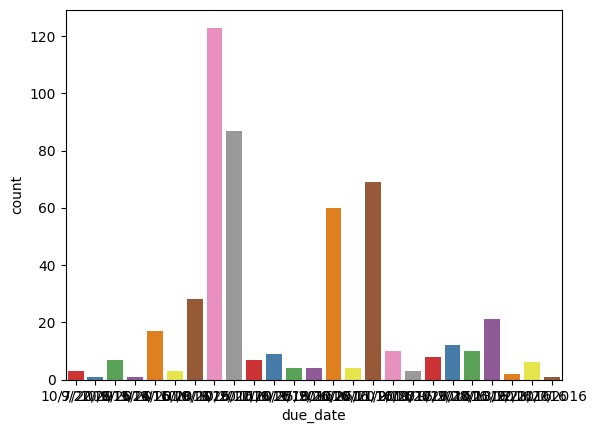

In [25]:
print("due dates of peoples: ")

sns.countplot(x='due_date', data=df, palette = "Set1")

paid time of people:


<Axes: xlabel='paid_off_time', ylabel='count'>

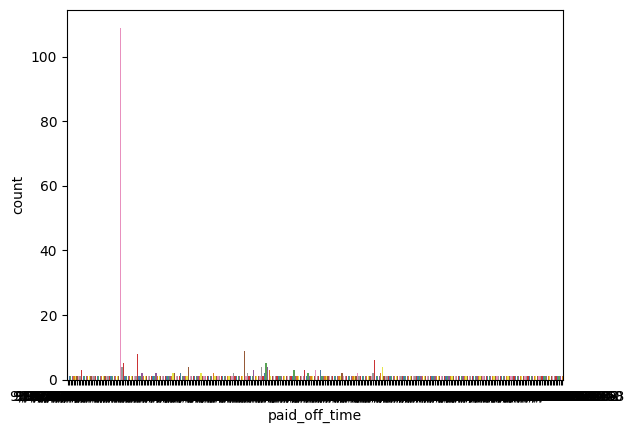

In [26]:
print("paid time of people:")
sns.countplot(x='paid_off_time', data=df, palette = "Set1")

past_due_days of pepole if any::


<Axes: xlabel='past_due_days', ylabel='count'>

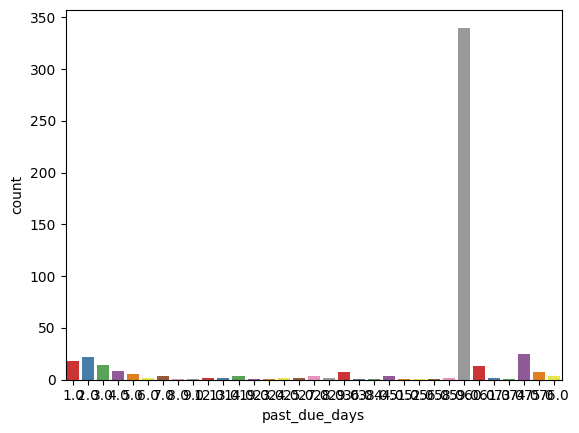

In [27]:
print("past_due_days of pepole if any::")
sns.countplot(x='past_due_days', data=df, palette = "Set1")

Now will print the count of people who are taking loans more with same age

age of people::


<Axes: xlabel='age', ylabel='count'>

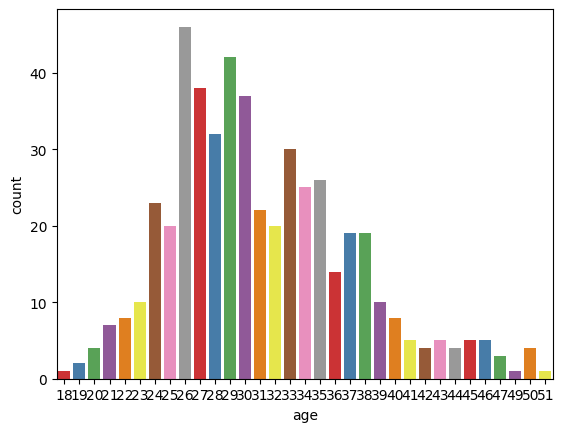

In [28]:
print("age of people::")
sns.countplot(x='age', data=df, palette = "Set1")

Lets print the count of education background of pepole who are taking loan
Encoding of non-numerical values

In [29]:
df['loan_status'].replace('Y',1,inplace = True)
df['loan_status'].replace('N',0,inplace = True)

In [30]:
df['loan_status'].value_counts()

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [31]:
df['TotalIncome'].value_counts()

9/11/2016PAIDOFF               119
9/12/2016PAIDOFF                97
9/11/2016COLLECTION             71
9/12/2016COLLECTION_PAIDOFF     47
9/11/2016COLLECTION_PAIDOFF     41
9/14/2016PAIDOFF                33
9/13/2016PAIDOFF                23
9/10/2016COLLECTION             20
9/10/2016PAIDOFF                19
9/10/2016COLLECTION_PAIDOFF      7
9/9/2016PAIDOFF                  5
9/9/2016COLLECTION               5
9/9/2016COLLECTION_PAIDOFF       5
9/8/2016PAIDOFF                  4
9/12/2016COLLECTION              4
Name: TotalIncome, dtype: int64

In [32]:
df['age'].value_counts()

26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
32    20
25    20
37    19
38    19
36    14
23    10
39    10
40     8
22     8
21     7
41     5
46     5
45     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
18     1
49     1
Name: age, dtype: int64

In [33]:
df['due_date'].value_counts()

10/10/2016    123
9/25/2016      87
10/11/2016     69
9/26/2016      60
10/9/2016      28
10/13/2016     21
9/24/2016      17
9/27/2016      12
9/28/2016      10
11/10/2016     10
11/9/2016       9
10/12/2016      8
9/17/2016       7
10/8/2016       7
9/23/2016       6
10/25/2016      4
10/26/2016      4
9/18/2016       4
10/7/2016       3
9/19/2016       3
9/16/2016       3
11/12/2016      2
9/22/2016       1
9/15/2016       1
11/7/2016       1
Name: due_date, dtype: int64

In [34]:
df['Principal'].value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

In [35]:
df['past_due_days'].value_counts()

59.0    340
74.0     25
2.0      22
1.0      18
3.0      14
60.0     13
4.0       8
75.0      7
29.0      7
5.0       5
76.0      3
7.0       3
14.0      3
44.0      3
27.0      3
24.0      2
25.0      2
6.0       2
12.0      2
13.0      2
28.0      2
58.0      2
61.0      2
36.0      1
73.0      1
23.0      1
38.0      1
19.0      1
52.0      1
51.0      1
9.0       1
56.0      1
8.0       1
Name: past_due_days, dtype: int64

In [36]:
df['terms'].value_counts()

30    272
15    207
7      21
Name: terms, dtype: int64

In [37]:
df['paid_off_time'].value_counts()

9/25/2016 9:00      109
9/26/2016 9:00        9
10/10/2016 9:00       8
10/13/2016 9:00       6
9/25/2016 13:00       5
                   ... 
9/22/2016 20:51       1
9/29/2016 13:36       1
9/21/2016 15:33       1
9/15/2016 20:36       1
10/19/2016 11:58      1
Name: paid_off_time, Length: 320, dtype: int64

Now we will use Catplot to visualize the plot for the Gender, and Age of the applicant.

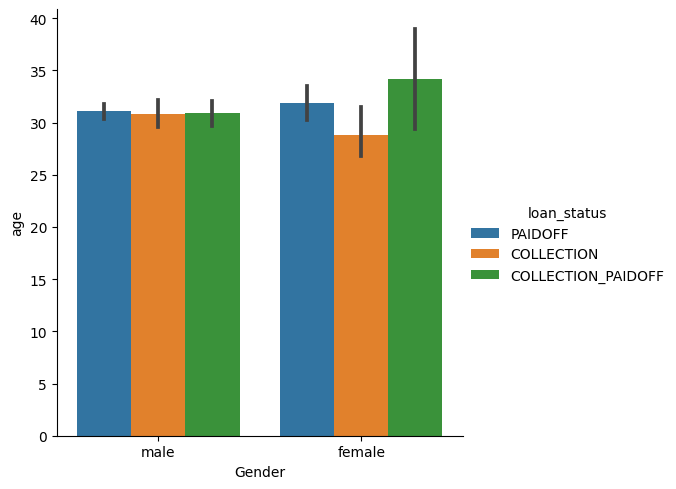

In [38]:
sns.catplot(x="Gender", y="age",
            hue="loan_status",
            kind="bar",
            data=df)

Here will visualise educationa and age

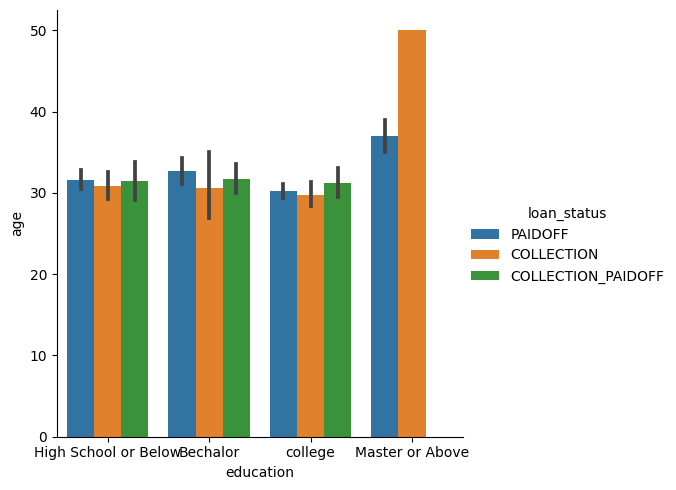

In [39]:
sns.catplot(x="education", y="age",
            hue="loan_status",
            kind="bar",
            data=df)

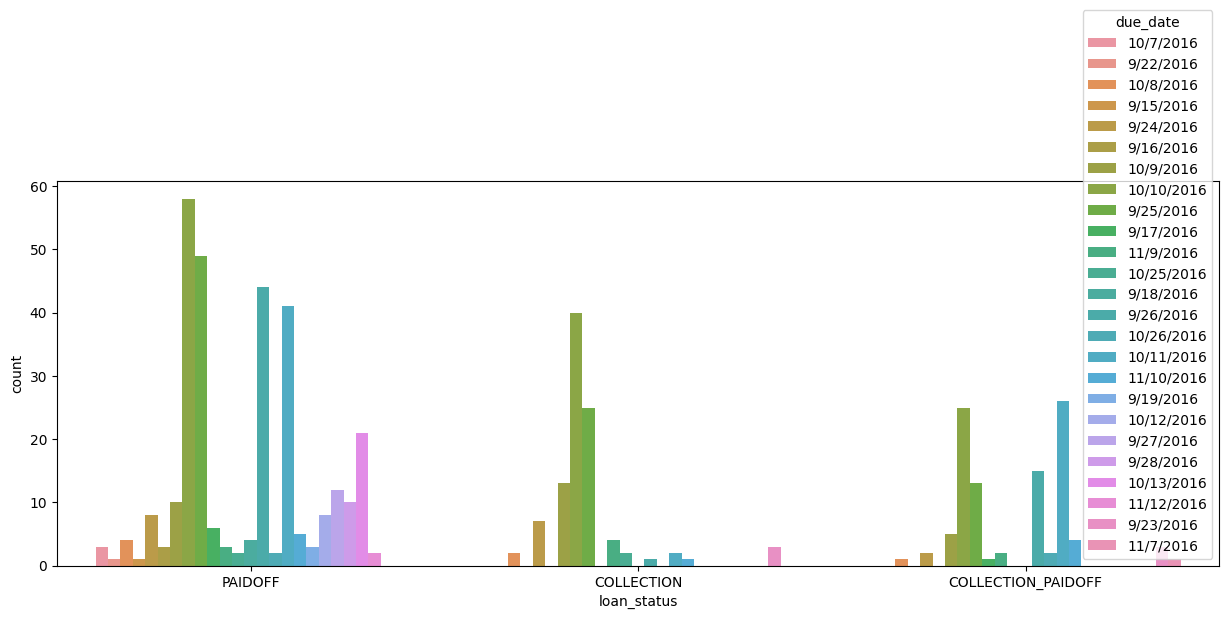

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x='loan_status', hue='due_date', data=df);

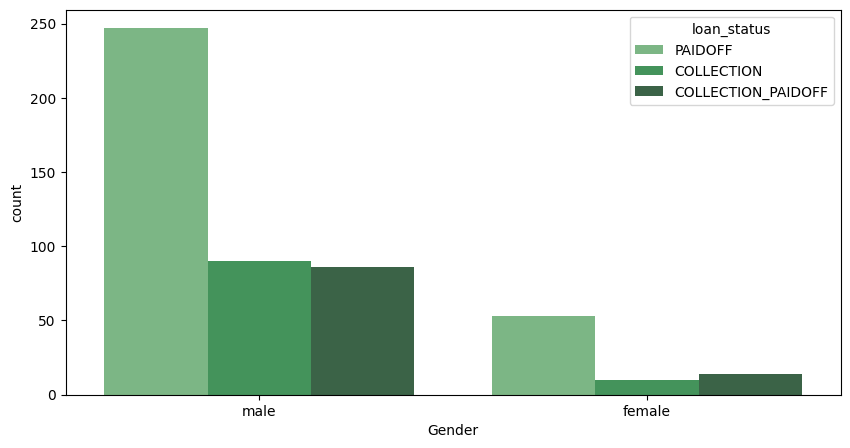

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=df, hue='loan_status', palette='Greens_d')
plt.show()

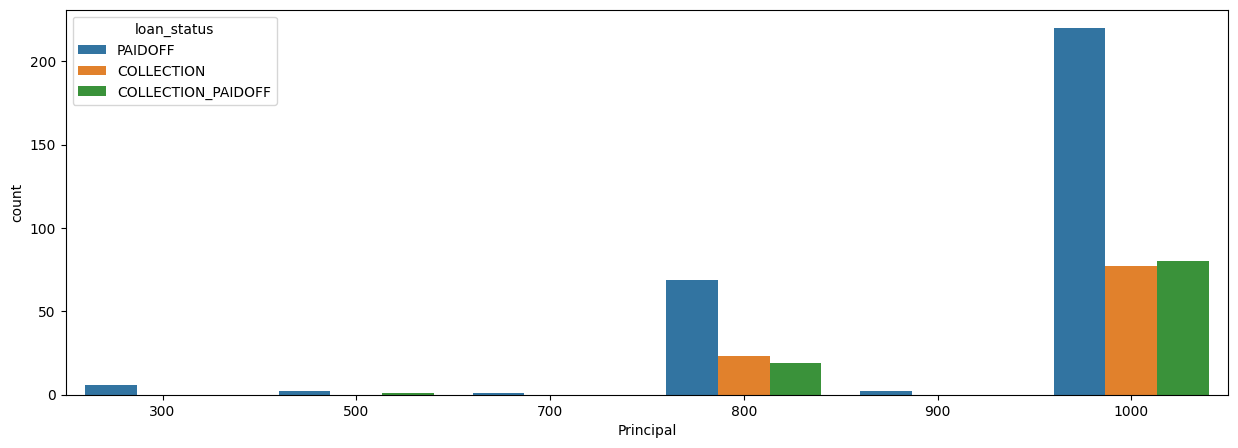

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(x='Principal', hue='loan_status', data=df);

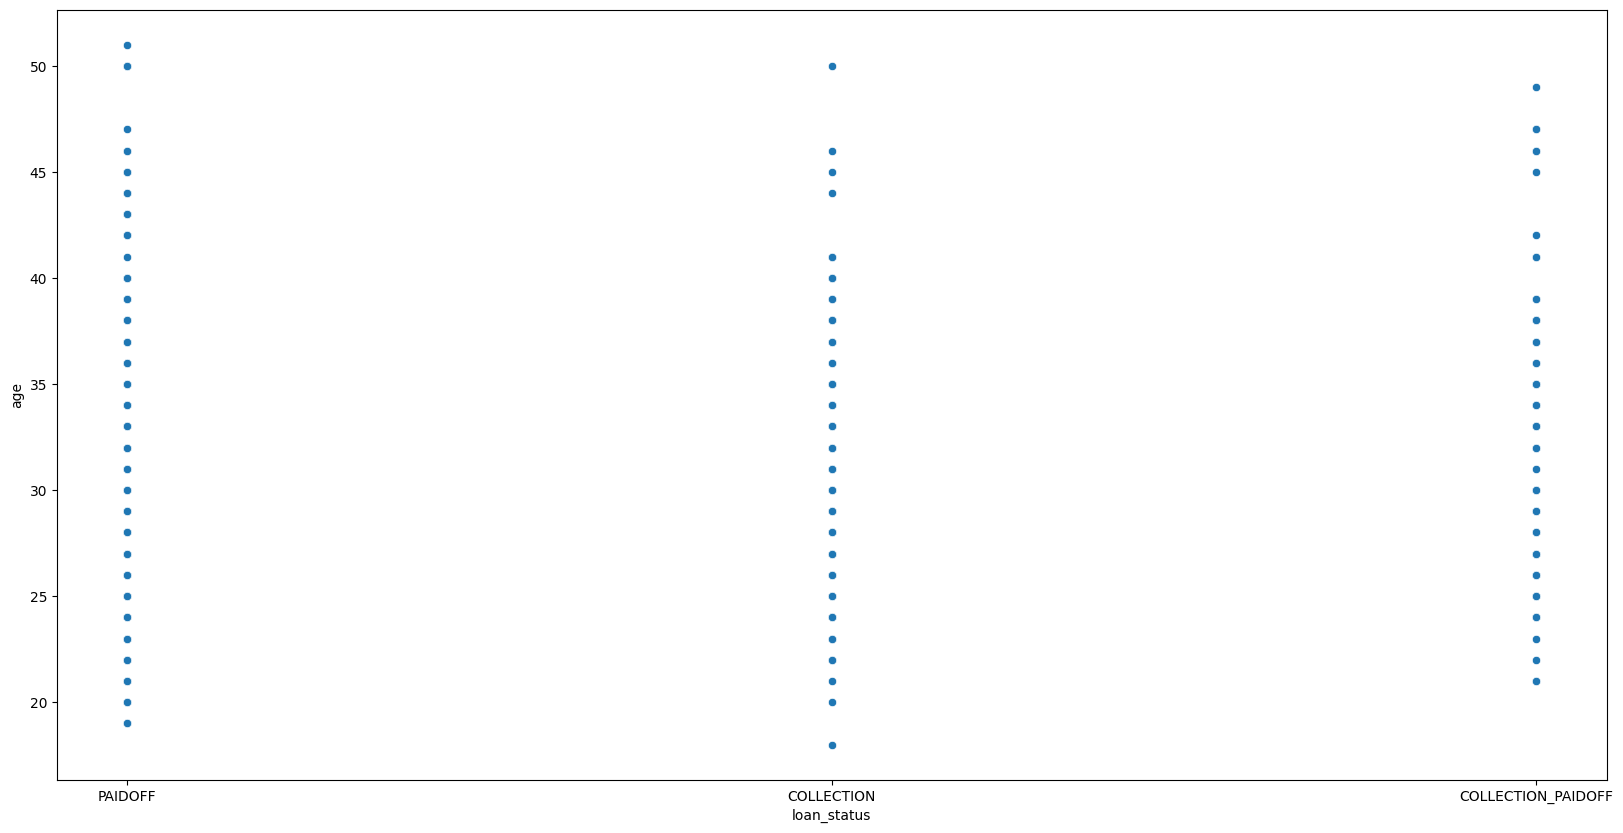

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='loan_status', y='age', data=df)
plt.show()

<Figure size 1000x600 with 0 Axes>

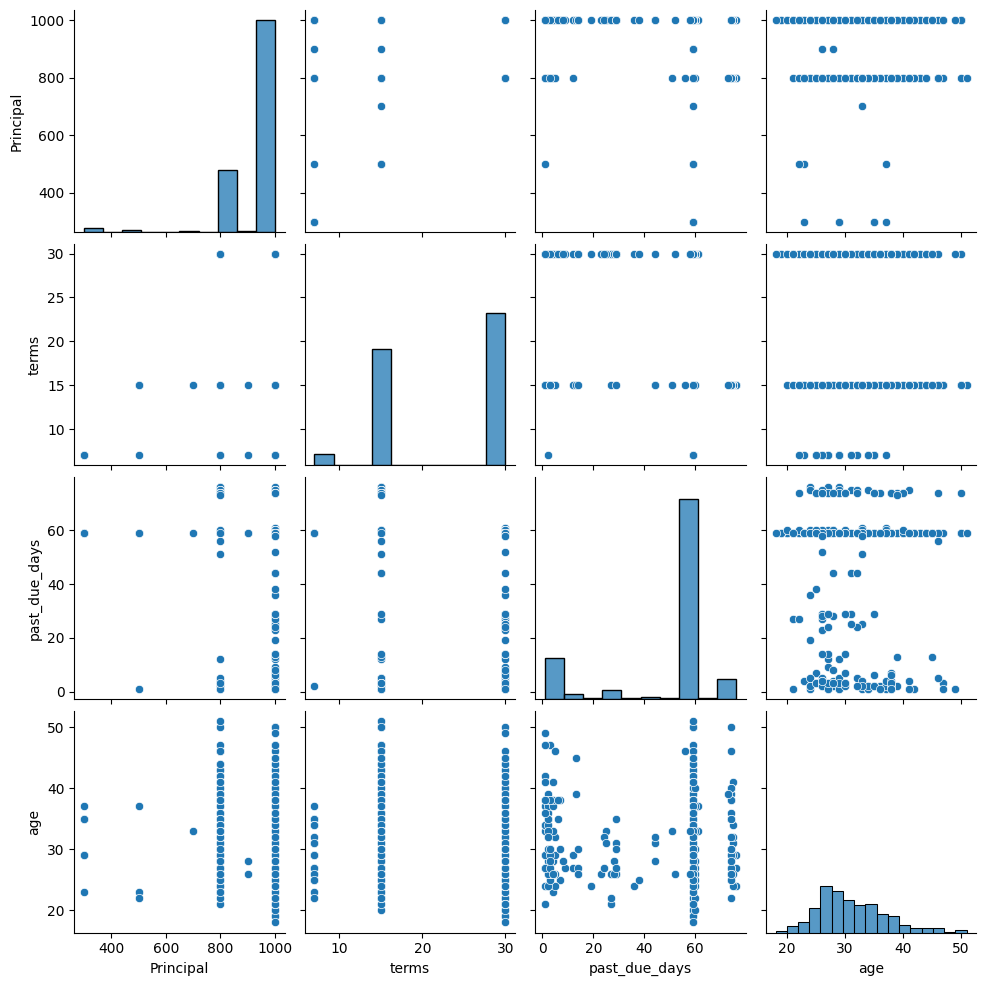

In [44]:
plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

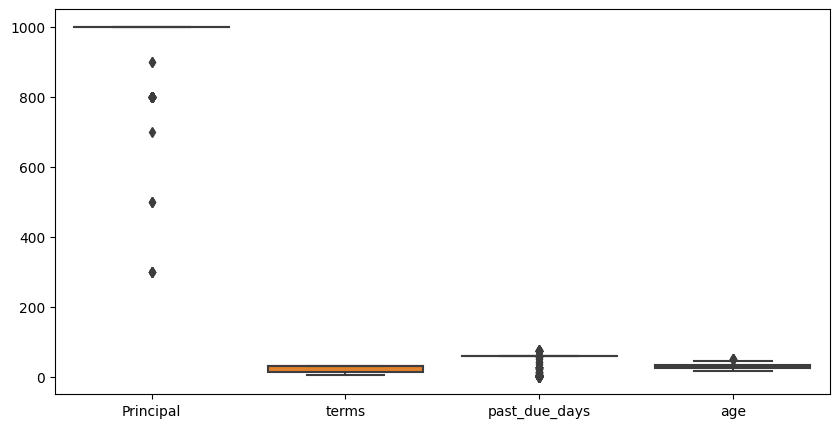

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

<ipython-input-46-a2824bc1620d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corel=df.corr()


<Axes: >

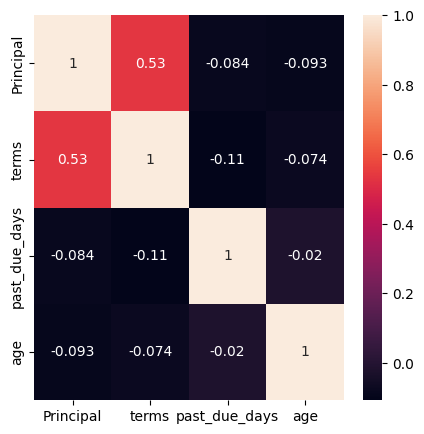

In [46]:
plt.figure(figsize=(5,5))#fig size
df_corel=df.corr()
sns.heatmap(df_corel,annot=True)

In [47]:
df.groupby('loan_status').median()

<ipython-input-47-dc66b9cc0f47>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('loan_status').median()


,Principal,terms,past_due_days,age
loan_status,,,,
COLLECTION,1000.0,30.0,60.0,30.0
COLLECTION_PAIDOFF,1000.0,30.0,3.0,30.0
PAIDOFF,1000.0,30.0,59.0,30.0


**# Spliting the dataset into train and test set**

train-test split:
      Estimates the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

Label Encoding:
Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.
           



Train set: The training dataset is a set of data that was utilized to fit the model. The dataset on which the model is trained. This data is seen and learned by the model.

The iloc property gets, or sets, the value(s) of the specified indexes.
Specify both row and column with an index.
To access more than one row, use double brackets and specify the indexes, separated by commas:

In [48]:
x=df.iloc[:,2:-1].values
y=df.iloc[:,-1].values
print(x[:10])
print(y[:10])

[[1000 30 '9/8/2016' '10/7/2016' '9/14/2016 19:31' 59.0 45
  'High School or Below' 'male' '9/8/2016PAIDOFF']
 [1000 30 '9/8/2016' '10/7/2016' '10/7/2016 9:00' 59.0 50 'Bechalor'
  'female' '9/8/2016PAIDOFF']
 [1000 30 '9/8/2016' '10/7/2016' '9/25/2016 16:58' 59.0 33 'Bechalor'
  'female' '9/8/2016PAIDOFF']
 [1000 15 '9/8/2016' '9/22/2016' '9/22/2016 20:00' 59.0 27 'college'
  'male' '9/8/2016PAIDOFF']
 [1000 30 '9/9/2016' '10/8/2016' '9/23/2016 21:36' 59.0 28 'college'
  'female' '9/9/2016PAIDOFF']
 [300 7 '9/9/2016' '9/15/2016' '9/9/2016 13:45' 59.0 35 'Master or Above'
  'male' '9/9/2016PAIDOFF']
 [1000 30 '9/9/2016' '10/8/2016' '10/7/2016 23:07' 59.0 29 'college'
  'male' '9/9/2016PAIDOFF']
 [1000 30 '9/9/2016' '10/8/2016' '10/5/2016 20:33' 59.0 36 'college'
  'male' '9/9/2016PAIDOFF']
 [1000 30 '9/9/2016' '10/8/2016' '10/8/2016 16:00' 59.0 28 'college'
  'male' '9/9/2016PAIDOFF']
 [800 15 '9/10/2016' '9/24/2016' '9/24/2016 13:00' 59.0 26 'college'
  'male' '9/10/2016PAIDOFF']]
['0

In [49]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,TotalIncome,past_due_days _log
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,59.0,45,High School or Below,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,59.0,50,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,59.0,33,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,59.0,27,college,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,59.0,28,college,female,9/9/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...


In [50]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,500.000000,500.000000
mean,943.200000,22.824000,49.804000,31.116000
std,115.240274,8.000064,21.710834,6.084784
min,300.000000,7.000000,1.000000,18.000000
25%,1000.000000,15.000000,59.000000,27.000000
50%,1000.000000,30.000000,59.000000,30.000000
75%,1000.000000,30.000000,59.000000,35.000000
max,1000.000000,30.000000,76.000000,51.000000


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 10)
(100, 10)
(400,)
(100,)


In [52]:
df.rename(columns={'installment':'int.rate'},inplace=True)
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'TotalIncome', 'past_due_days _log'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 10), (100, 10), (400,), (100,))

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 10), (100, 10), (400,), (100,))

**Feature engineering**

Splitting due date separately  into Day Month Year

In [55]:
df['Date']= df['effective_date'].str.split('/').str[0]
df['Month']=df['effective_date'].str.split('/').str[1]
df['Year']=df['effective_date'].str.split('/').str[2]
df.head()


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,TotalIncome,past_due_days _log,Date,Month,Year
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,59.0,45,High School or Below,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,59.0,50,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,59.0,33,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,59.0,27,college,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,59.0,28,college,female,9/9/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,9,2016


In [56]:
df['D']= df['due_date'].str.split('/').str[0]
df['M']=df['due_date'].str.split('/').str[1]
df['Y']=df['due_date'].str.split('/').str[2]

df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,TotalIncome,past_due_days _log,Date,Month,Year,D,M,Y
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,59.0,45,High School or Below,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,10,7,2016
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,59.0,50,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,10,7,2016
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,59.0,33,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,10,7,2016
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,59.0,27,college,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,9,22,2016
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,59.0,28,college,female,9/9/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,9,2016,10,8,2016


Now after splling effective_date and due_date into Month ,year,date separetly now we can drop those coloums because it's has been already stored into separte rows

In [57]:
dff=df.drop(['effective_date','due_date'],axis=1)
dff.head()

,Loan_ID,loan_status,Principal,terms,paid_off_time,past_due_days,age,education,Gender,TotalIncome,past_due_days _log,Date,Month,Year,D,M,Y
0,xqd20166231,PAIDOFF,1000,30,9/14/2016 19:31,59.0,45,High School or Below,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,10,7,2016
1,xqd20168902,PAIDOFF,1000,30,10/7/2016 9:00,59.0,50,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,10,7,2016
2,xqd20160003,PAIDOFF,1000,30,9/25/2016 16:58,59.0,33,Bechalor,female,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,10,7,2016
3,xqd20160004,PAIDOFF,1000,15,9/22/2016 20:00,59.0,27,college,male,9/8/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,8,2016,9,22,2016
4,xqd20160005,PAIDOFF,1000,30,9/23/2016 21:36,59.0,28,college,female,9/9/2016PAIDOFF,0 9/8/2016PAIDOFF\n1 ...,9,9,2016,10,8,2016
